In [1]:
from calculate import Player
from nba_py import player as players
from nba_py.player import get_player
        
p = Player("Stephen Curry")
pid = get_player("Stephen","Curry")
p.getFloorAverage()

Failed to load GoldStats.


/Users/marek5050/machinelearning/NBA/calculate.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  p.Bonus[p.Bonus < 2] = 0.0


37.07954545454545

In [2]:
res = players

In [21]:
players.PlayerPerformanceSplits(pid).overall()

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,Overall,2016-17,39,33,6,0.846,33.7,8.2,17.4,0.468,...,1,1,1,1,1,1,1,1,266,2016-17


In [18]:
players.PlayerPosition

nba_py.constants.PlayerPosition

In [92]:
from pandas.stats.moments import rolling_var
import numpy as np
a = pd.DataFrame(p.seasonStatsWithDKFPS.DKFPS)
b= a.rolling(window=len(df), min_periods=1).mean()[:5]
b.aggregate([np.mean])
# print(a.mean(),a.var(),a.mad(),a.kurt(),a.skew())
#print(a.describe())
#

AttributeError: 'DataFrame' object has no attribute 'aggregate'

In [57]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 4),index=pd.date_range('1/1/2000', periods=1000),columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
#df.rolling(window=60).sum().plot(subplots=True)

In [15]:
p.seasonStatsWithDKFPS.DKFPS.var()

77.78449730094466

In [91]:
import glob
import pandas as pd

path = r'data/output/'  # use your path
allFiles = glob.glob(path + "/2*.csv")
dfTemp = pd.DataFrame()
features = ["Name", "Final", "AvgPointsPerGame", "O/U", "odds"]

for file_ in allFiles:
    try:
        df1 = pd.read_csv(file_, index_col=None, header=0)
        dfTemp = pd.concat([dfTemp, df1[features]])
    except:
        pass

df = dfTemp[features]

In [92]:
#,-?[0-9]+\.[0-9]*\n remove last column
ouAndfinal = df[(df["O/U"] > df["O/U"].mean()) & (df["Final"] > df["AvgPointsPerGame"])]["Name"].count() / df.loc[:,"Name"].count()
finalAvg = df[(df["Final"] > df["AvgPointsPerGame"])]["Name"].count() / df.loc[:,"Name"].count()
print("O/U > O/UMean and Final > AvgPoints : " + str(ouAndfinal))
print("Final > AvgPoints: " + str(finalAvg))
print("Sooo... " +  str(ouAndfinal/finalAvg))

O/U > O/UMean and Final > AvgPoints : 0.215348991068
Final > AvgPoints: 0.390009923917
Sooo... 0.552162849873


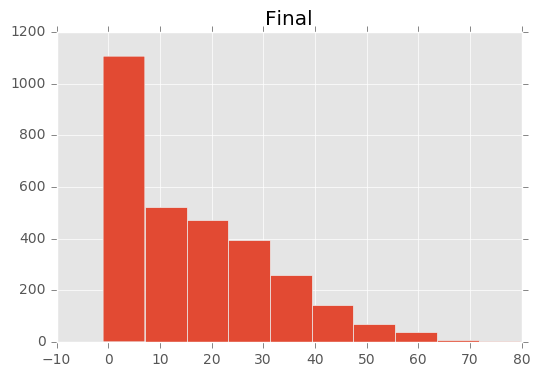

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df.hist(column="Final")
df.plot();

In [94]:
df.describe()

,Final,AvgPointsPerGame,O/U,odds
count,3023.000000,3023.000000,3023.000000,3023.000000
mean,16.222048,18.332682,211.981972,-0.036718
std,15.379173,11.467337,9.695731,7.273207
min,-1.000000,-1.000000,187.500000,-16.000000
25%,0.750000,9.533000,206.000000,-5.250000
50%,13.500000,16.581000,212.500000,-1.000000
75%,26.500000,24.785500,218.500000,5.000000
max,79.750000,64.440000,240.500000,16.000000
